In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

#**Create Data To View and Fit** 

In [2]:
from sklearn.datasets import make_circles

In [3]:
n_samples  = 1000

In [4]:
X,Y = make_circles(
    n_samples, noise=0.03, random_state=42
 )

In [5]:
X,Y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

# **Visualize The Data**

In [6]:
circles = pd.DataFrame({"X0" : X[:,0], "X1" : X[:,1] , "label": Y})

In [7]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


# **Visualize The Plot**

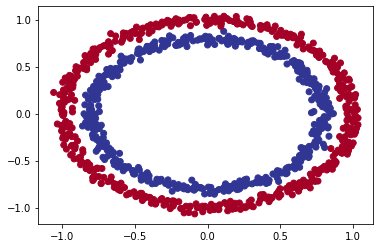

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap = plt.cm.RdYlBu)

# **Input and Output Shapes**

In [9]:
X.shape , Y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(Y)

(1000, 1000)

In [11]:
X[0], Y[0]

(array([0.75424625, 0.23148074]), 1)

# **Steps In Modelling**

# **Model No 1**

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), # Binary CrossentTropy for Binary Classifications
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_1.fit(tf.expand_dims(X,axis=1),Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.6665 - accuracy: 0.4909
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7085 - accuracy: 0.5048
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5017
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4989


In [13]:
model_1.evaluate(X,Y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.4990


[0.6935907006263733, 0.49900001287460327]

# **Model No 2**

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model_2.fit(tf.expand_dims(X, axis=1), Y, epochs=100, verbose=0)


In [15]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5000


[0.6942706108093262, 0.5]

In [16]:
model_1.evaluate(X,Y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4990


[0.6935907006263733, 0.49900001287460327]

# **Model No 3**

In [17]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

model_3.fit(tf.expand_dims(X, axis=1),Y, epochs=200, verbose=0)


In [18]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5000


[0.695518434047699, 0.5]

# **Model No 4**

In [19]:
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

model_4.fit(tf.expand_dims(X, axis=1), Y, epochs=100, verbose=0)

In [20]:
model_4.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

# **Create Function To Visualize**

In [21]:
def plot_decision_boundry(model, X,Y):

  #Define Axis Boundry of Plot and Create Meshgrid
  
  x_min , x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

  #  Create X value( We are Going to make Prediction)

  x_in = np.c_[xx.ravel(),yy.ravel()]

  # Make Predictions

  y_pred = model.predict(x_in)

  # Check For Multiclass 

  if len(y_pred[0])>1:
    print('Doing Muliticlass Classification')

    # We have to Reshape The Predictions

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print('Doing Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot Decision Boundry


  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

  plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



Doing Binary Classification


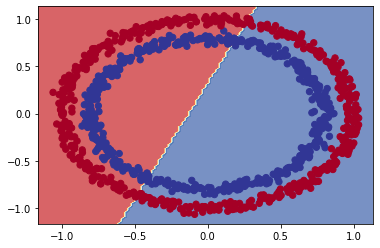

In [22]:
plot_decision_boundry(model=model_1, X=X, Y=Y)

Doing Binary Classification


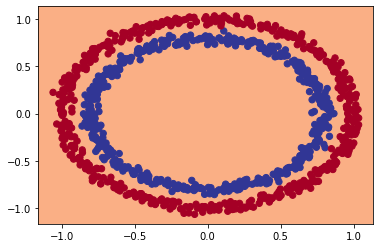

In [23]:
plot_decision_boundry(model=model_2, X=X, Y=Y)

Doing Binary Classification


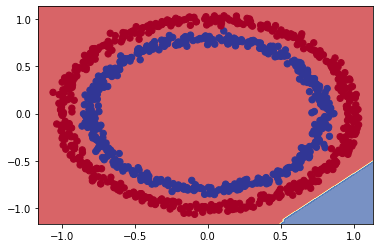

In [24]:
plot_decision_boundry(model= model_3, X=X, Y=Y)

Doing Binary Classification


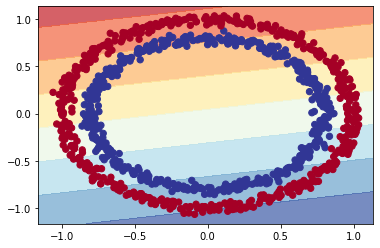

In [25]:
plot_decision_boundry(model=model_4, X=X, Y=Y)

# **Make Our Poor Classification Model**

In [26]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
Y_regression = tf.range(100, 1100, 5)



In [27]:
X_regression.shape , Y_regression.shape

(TensorShape([200]), TensorShape([200]))

In [28]:
# Spilt Regression into Training and Test Data Sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
Y_reg_train = Y_regression[:150]
Y_reg_test = Y_regression[150:]




# **Model No 5**

In [29]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_5.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_5.fit(tf.expand_dims(X_reg_train, axis=1), Y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

In [30]:
model_5.evaluate(X_reg_test, Y_reg_test)

2/2 [==============================] - 0s 5ms/step - loss: 57.8927 - mae: 57.8927


[57.892669677734375, 57.89266586303711]

# **Plot Model Predictions**

In [31]:
Y_reg_pred = model_5.predict(X_reg_test)

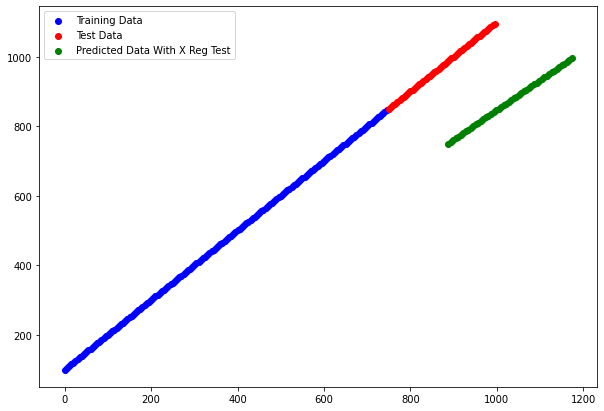

In [32]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train, Y_reg_train, c='blue', label = 'Training Data' )
plt.scatter(X_reg_test, Y_reg_test, c='red', label='Test Data')
plt.scatter(Y_reg_pred, X_reg_test, c='green', label='Predicted Data With X Reg Test')

plt.legend()

In [33]:
Y_reg_pred.shape , X_reg_test.shape

((50, 1), TensorShape([50]))

In [34]:
Y_reg_pred_squeeze = tf.squeeze(Y_reg_pred)

In [35]:
Y_reg_pred_squeeze.shape, X_reg_test.shape

(TensorShape([50]), TensorShape([50]))

# **Plot Model Predictions**

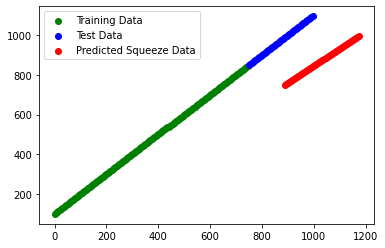

In [36]:
plt.scatter(X_reg_train, Y_reg_train , color='green', label='Training Data')
plt.scatter(X_reg_test, Y_reg_test, color='blue', label='Test Data')
plt.scatter(Y_reg_pred_squeeze, X_reg_test, color='Red', label='Predicted Squeeze Data')
plt.legend()

Doing Binary Classification


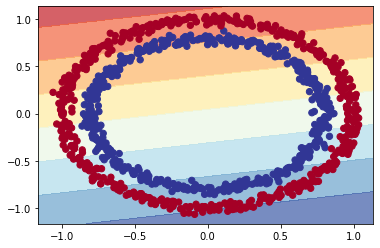

In [37]:
plot_decision_boundry(model=model_4 , X=X, Y=Y)

# **Non Linerality (The Missing Piece)**

# **Model No 6**

In [38]:
tf.random.set_seed(42)


model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation= tf.keras.activations.linear)
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


history =  model_6.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0436 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9939 - accuracy: 0.4955
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9648 - accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9204 - accuracy: 0.4964
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8385 - accuracy: 0.4984
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8108 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6778 - accuracy: 0.5000
Epoch 11/

In [39]:
model_6.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4920


[0.6949900984764099, 0.492000013589859]

Doing Binary Classification


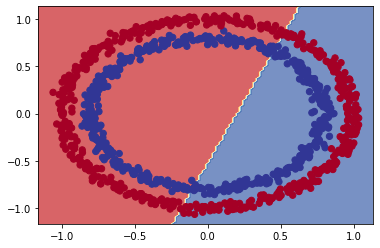

In [40]:
plot_decision_boundry(model=model_6, X=X, Y=Y)

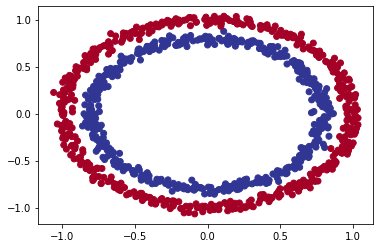

In [41]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

# **Lets Build Non Linear Neural Network**

In [42]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation='relu'),

])

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


model_7.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0436 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9939 - accuracy: 0.4955
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9648 - accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9204 - accuracy: 0.4964
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8385 - accuracy: 0.4984
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8108 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6778 - accuracy: 0.5000
Epoch 11/

In [43]:
model_7.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4920


[0.6949900984764099, 0.492000013589859]

# **Model No 8**

In [44]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1)
])


model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_8.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [45]:
model_8.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

# **Model No 9**

In [46]:
from keras.layers import Dense, Activation, Flatten

In [47]:
tf.random.set_seed(42)


model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])


model_9.add(Flatten())

model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_9.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [48]:
model_9.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.294800341129303, 0.9909999966621399]

# **Model No 10**

In [49]:
tf.random.set_seed(42)


model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])


model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)


model_10.add(Flatten())


model_10.fit(tf.expand_dims(X, axis=1), Y, epochs=100, verbose=0)

In [50]:
model_10.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9900


[0.027888145297765732, 0.9900000095367432]

Doing Binary Classification


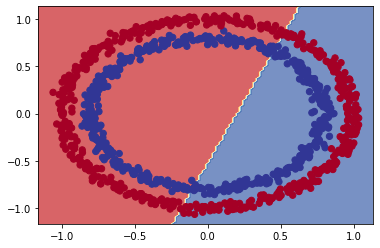

In [51]:
plot_decision_boundry(model= model_6 , X=X, Y=Y)

Doing Binary Classification


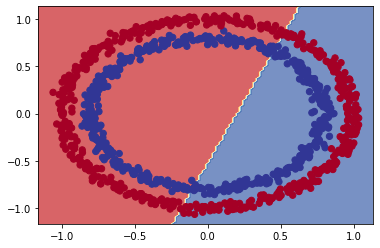

In [52]:
plot_decision_boundry(model= model_7, X=X, Y=Y)

Doing Binary Classification


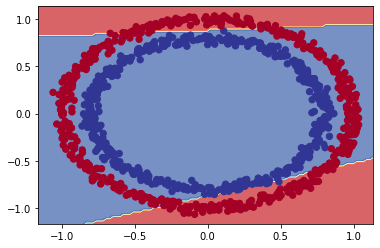

In [53]:
plot_decision_boundry(model= model_8, X=X, Y=Y)

Doing Binary Classification


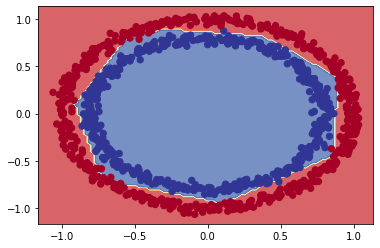

In [54]:
plot_decision_boundry(model = model_9, X=X, Y=Y)

Doing Binary Classification


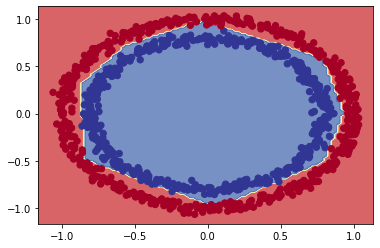

In [55]:
plot_decision_boundry(model = model_10, X=X, Y=Y)

# **Replicate Non Linear Function From Scratch**

In [56]:
A  = tf.cast(tf.range(-10, 10), tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

# **Visualize Toy Tensor**

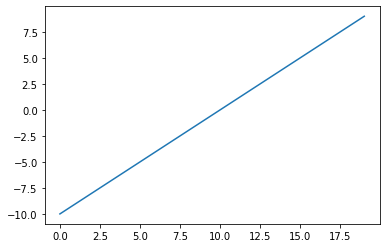

In [57]:
plt.plot(A)

# **Lets Start By Replicating Sigmoid**

In [58]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))



In [59]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

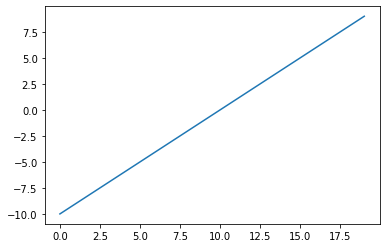

In [60]:
plt.plot(A)

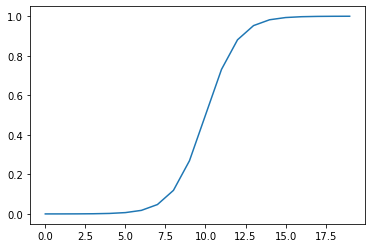

In [61]:
plt.plot(sigmoid(A))

# **Lets Create Relu Function**

In [62]:
def relu(x):
  return tf.maximum(0,x)

In [63]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

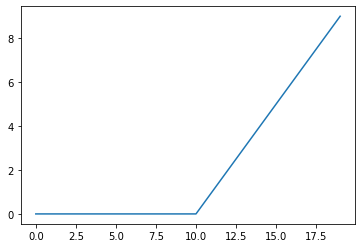

In [64]:
plt.plot(relu(A))

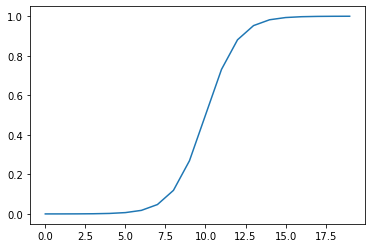

In [65]:
plt.plot(sigmoid(A))

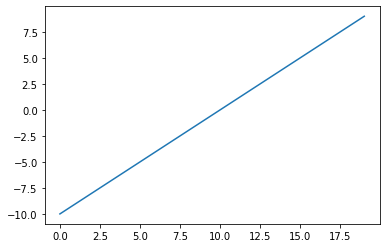

In [66]:
plt.plot(A)

# **Lets Try Activation Function**

In [67]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

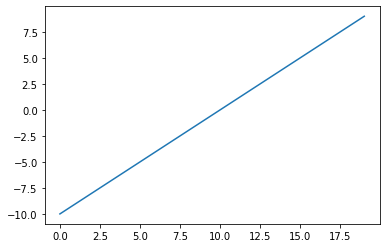

In [68]:
plt.plot(tf.keras.activations.linear(A))

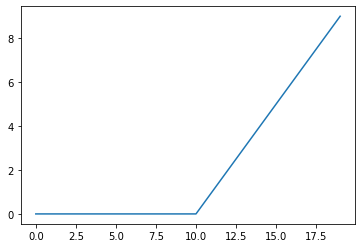

In [69]:
plt.plot(relu(A))

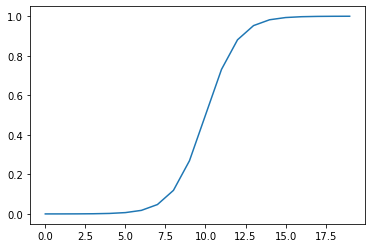

In [70]:
plt.plot(sigmoid(A))

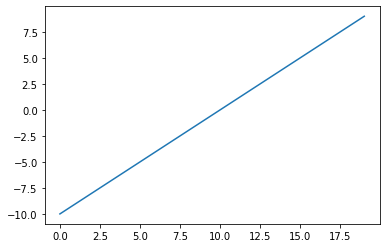

In [71]:
plt.plot(A)

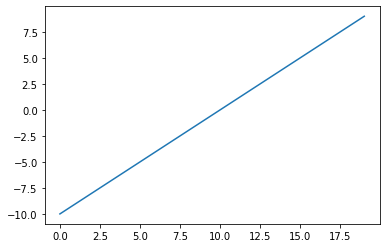

In [72]:
plt.plot(tf.keras.activations.linear(A))

# **Getting Result With Less Time By Tweeking**

In [73]:
len(X)

1000

# **Split Data Into Train and test Data Sets**

In [74]:
X_train = X[:800]
X_test = X[800:]
Y_train = Y[:800]
Y_test = Y[800:]

# **Model No 11**

In [75]:
tf.random.set_seed(42)


model_11 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])


model_11.add(Flatten())
model_11.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history =  model_11.fit(tf.expand_dims(X_train, axis=1), Y_train,  epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4975
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5138
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5175
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5200
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5300
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5350
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5400
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5400
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5425
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5387
Epoch 11/

In [76]:
model_11.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7450


[0.5626758337020874, 0.7450000047683716]

Doing Binary Classification
Doing Binary Classification


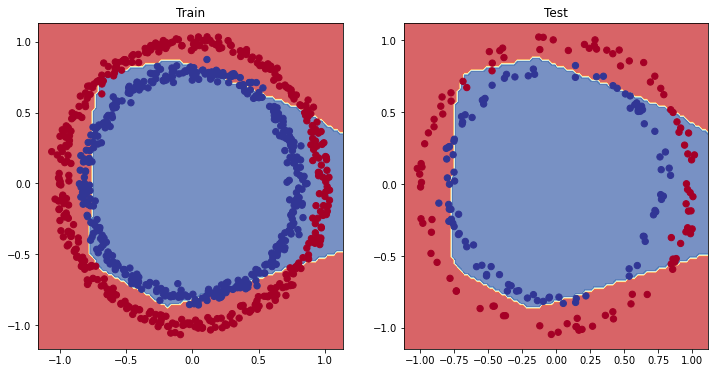

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundry(model=model_11, X=X_train, Y=Y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundry(model=model_11, X=X_test, Y=Y_test)
plt.show();

In [78]:
history.history

{'accuracy': [0.4975000023841858,
  0.5137500166893005,
  0.5174999833106995,
  0.5199999809265137,
  0.5299999713897705,
  0.5350000262260437,
  0.5400000214576721,
  0.5400000214576721,
  0.5425000190734863,
  0.5387499928474426,
  0.5412499904632568,
  0.5475000143051147,
  0.5487499833106995,
  0.5475000143051147,
  0.5475000143051147,
  0.5525000095367432,
  0.550000011920929,
  0.550000011920929,
  0.5512499809265137,
  0.5525000095367432,
  0.5512499809265137,
  0.5487499833106995,
  0.5525000095367432,
  0.5512499809265137,
  0.5525000095367432,
  0.5525000095367432,
  0.5512499809265137,
  0.5537499785423279,
  0.5612499713897705,
  0.5612499713897705,
  0.5625,
  0.5587499737739563,
  0.5612499713897705,
  0.5637500286102295,
  0.5674999952316284,
  0.5637500286102295,
  0.5625,
  0.5537499785423279,
  0.5637500286102295,
  0.5699999928474426,
  0.5712500214576721,
  0.5699999928474426,
  0.5674999952316284,
  0.5699999928474426,
  0.5699999928474426,
  0.5712500214576721,
  

In [79]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692021,0.49750
1,0.687350,0.51375
2,0.684560,0.51750
3,0.683247,0.52000
4,0.682328,0.53000
...,...,...
95,0.555288,0.78250
96,0.552419,0.78500
97,0.548467,0.78750
98,0.544930,0.79375


Text(0.5, 1.0, 'Model 11 loss Curves')

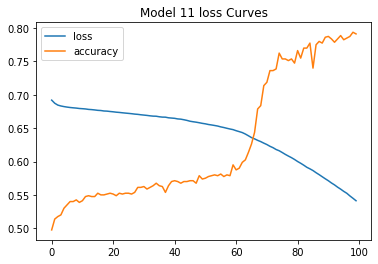

In [80]:
pd.DataFrame(history.history).plot()
plt.title('Model 11 loss Curves')

# **Graph Comparison For Model 10**

Doing Binary Classification
Doing Binary Classification


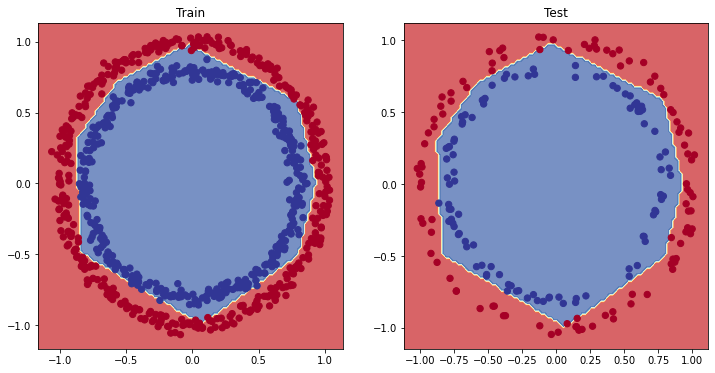

In [81]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundry(model=model_10, X=X_train, Y=Y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundry(model= model_10, X=X_test, Y=Y_test)
plt.show();

# **CallBack For Ideal Learning Rate**

In [82]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_12.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


model_12.add(Flatten())

# Create Learning rate Call Back

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs/20))


history_12 = model_12.fit(tf.expand_dims(X_train, axis=1),Y_train, epochs = 100, callbacks=[lr_schedular])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [83]:
model_12.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934520602226257, 0.4950000047683716]

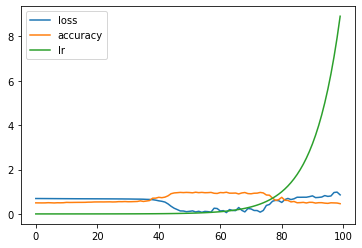

In [84]:
pd.DataFrame(history_12.history).plot()

# **Model No 13**

In [85]:
tf.random.set_seed(42)


model_13 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])


model_13.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


model_13.add(Flatten())


lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-4 * 10 ** (epochs/20))


history_13 = model_13.fit(tf.expand_dims(X_train, axis=1), Y_train,epochs=200, verbose=0, callbacks=[lr_schedular])

In [86]:
model_13.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 4ms/step - loss: 7.6353 - accuracy: 0.5050


[7.635349273681641, 0.5049999952316284]

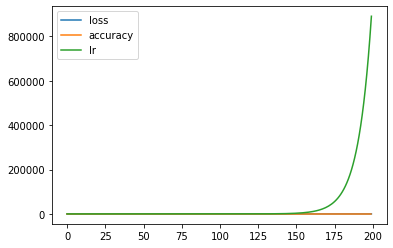

In [87]:
pd.DataFrame(history_13.history).plot()

# **Plot Learning Rate Versus Loss**

In [88]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))

In [89]:
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate Vs Loss')

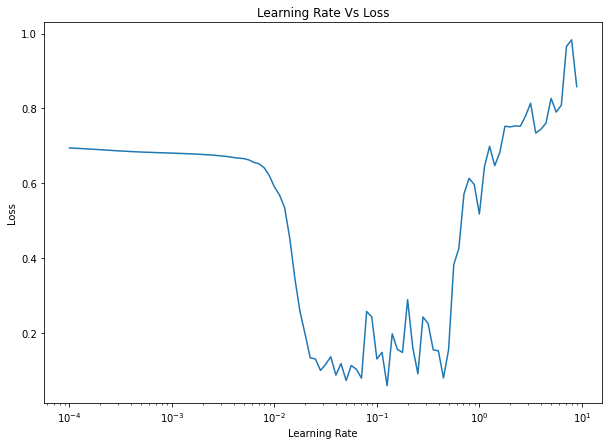

In [90]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_12.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs Loss')

# **Training And Evaluating Model With Ideal Output**

# **Model No 14**

In [91]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])


model_14.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)


model_14.add(Flatten())

history_14 = model_14.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 18ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 

Doing Binary Classification
Doing Binary Classification


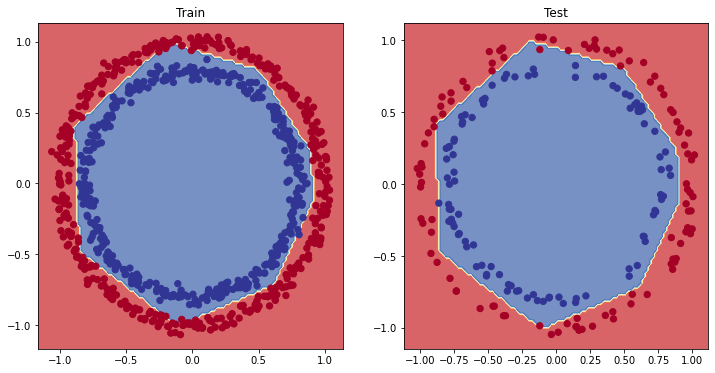

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundry(model= model_14, X = X_train, Y=Y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundry(model= model_14, X = X_test, Y=Y_test)

plt.show();


# **Classification Evaluation Metrics**

# **1-Accuracy**

In [93]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')
])

model_15.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)


model_15.add(Flatten())


history_15 =  model_15.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4975
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5138
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5175
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5200
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5300
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5350
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5400
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5400
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5425
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5387
Epoch 11/

In [94]:
model_15.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7450


[0.5626758337020874, 0.7450000047683716]

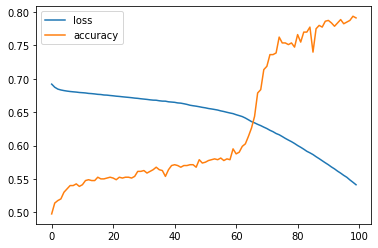

In [95]:
pd.DataFrame(history_15.history).plot()

# **2-Precision**

In [96]:
tf.random.set_seed(42)

model_16 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')

])

model_16.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['Precision']
)


model_16.add(Flatten())

history_16 =  model_16.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - precision: 0.4783 
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - precision: 0.5625
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6846 - precision: 0.5503
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - precision: 0.5423
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - precision: 0.5519
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6816 - precision: 0.5592
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - precision: 0.5618
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6805 - precision: 0.5583
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - precision: 0.5578
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6795 - precision: 0.552

In [97]:
model_16.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5627 - precision: 0.7264


[0.5626758337020874, 0.7264150977134705]

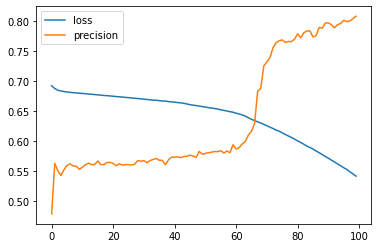

In [98]:
pd.DataFrame(history_16.history).plot()

# **Recall**

In [99]:
tf.random.set_seed(42)


model_17 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_17.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['Recall']
)


model_17.add(Flatten())


history_17 = model_17.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6920 - recall: 0.0274
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - recall: 0.1347
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6846 - recall: 0.2045
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6832 - recall: 0.2718
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - recall: 0.3317
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6816 - recall: 0.3416
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6810 - recall: 0.3741
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6805 - recall: 0.3940
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6801 - recall: 0.4214
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6795 - recall: 0.4190
Epoch 11/100
25/25 [=========

In [100]:
model_17.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5627 - recall: 0.7778


[0.5626758337020874, 0.7777777910232544]

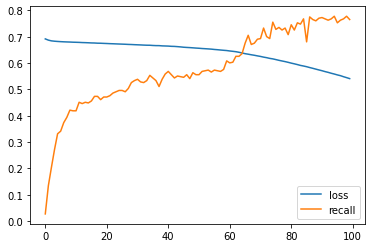

In [101]:
pd.DataFrame(history_17.history).plot()

# **Accuracy of Classification Model**

In [102]:
loss, accuracy = model_14.evaluate(X_test, Y_test)

print(f"Model loss on test Set : {loss}")
print(f"Model Accuracy on test Set : {(accuracy * 100):.2f}% ")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on test Set : 0.05740167573094368
Model Accuracy on test Set : 99.00% 


# **Create Confusion Matrix**

In [103]:
from sklearn.metrics import  confusion_matrix

In [104]:
y_pred = model_10.predict(X_test)

In [105]:
# confusion_matrix(Y_test, y_pred)

In [106]:
confusion_matrix(Y_test, tf.round(y_pred))

array([[99,  2],
       [ 1, 98]])

# **Make Confusion matrix**

In [151]:
import itertools
figsize = (10,10)

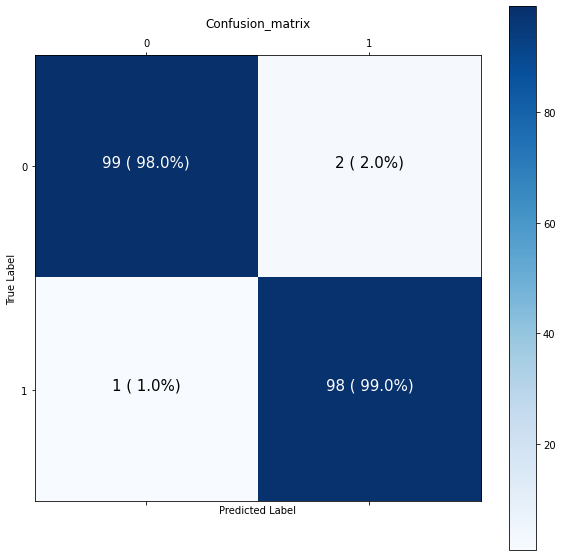

In [109]:
# Create Confusion matrix

cm = confusion_matrix(Y_test, tf.round(y_pred))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]


# Lets Pretify it

fig, ax = plt.subplots(figsize = figsize)

# Create Matrix Plot

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)


# Create Classes

classes = False


if classes:
  labels = classes 
else:
  labels = np.arange(cm.shape[0])


# Label The Axes

ax.set(title= 'Confusion_matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)


# Set Threshold for Different Colors

threshold = (cm.max() + cm.min() ) / 2

# Plot Text on Each Cell


for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm [i,j]} ({cm_norm[i,j] * 100 : .1f}%)",
  horizontalalignment='center',
  color='white' if cm[i,j] > threshold else 'Black',
  size=15)
  




# **Multiclass Classifications**

In [110]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [111]:
# Data is Already been Sorted For Us

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [112]:
# Show First Training Sample

print(f"Training Sample :\n {train_data[0]} \n ")
print(f"Training Label : \n {train_labels[0]}\n")

Training Sample :
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

# **Check Shape of Single Sample**

In [113]:
train_data[0].shape, train_labels[0].shape 

((28, 28), ())

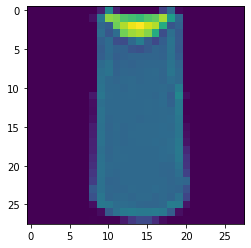

In [114]:
# Plot Single Sample

import matplotlib.pyplot as plt

plt.imshow(train_data[2])

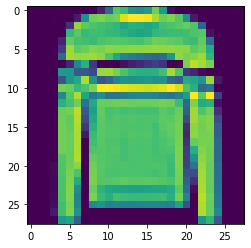

In [115]:
plt.imshow(train_data[5])

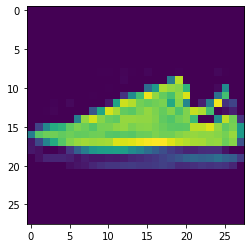

In [116]:
plt.imshow(train_data[6])

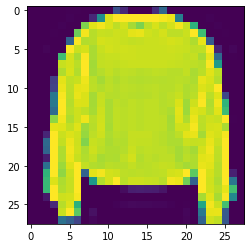

In [117]:
plt.imshow(train_data[7])

In [118]:
# Check out Sample label

train_labels[0], train_labels[6]

(9, 7)

# **Becoming one With the Data**

In [119]:
# Create Small List So that We Indexed Values According to Human Readable

class_names = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker", "Bag","Ankle boot"]
len(class_names)

10

# **Plot Example**

Text(0.5, 1.0, 'Pullover')

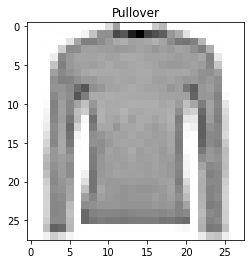

In [120]:
index_of_choice=37
plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

# **Plot Multiple Random Images**

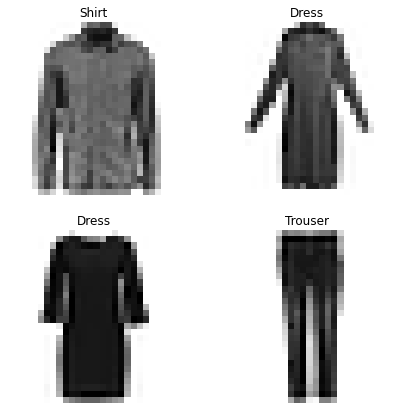

In [121]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# **Build Multiclass Classification Network Model**

In [122]:
tf.random.set_seed(42)


model_18 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])


model_18.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


non_norm_hist = model_18.fit(train_data, train_labels, epochs=100, validation_data=(test_data,test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_ac

In [123]:
model_18.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.7482 - accuracy: 0.7396


[0.7481804490089417, 0.7396000027656555]

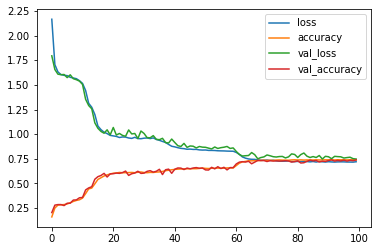

In [124]:
pd.DataFrame(non_norm_hist.history).plot()

# **Model No 19**

In [125]:
tf.random.set_seed(42)


model_19 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_19.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


non_norm_hist_19 = model_19.fit(train_data, train_labels, epochs=10, validation_data=[test_data, test_labels])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [126]:
model_19.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 1.5390 - accuracy: 0.3549


[1.5390430688858032, 0.3549000024795532]

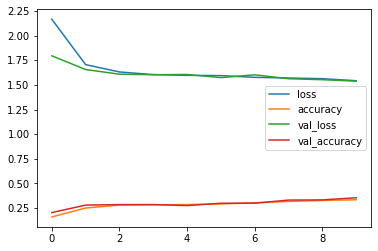

In [127]:
pd.DataFrame(non_norm_hist_19.history).plot()

# **Model No 20**

In [128]:
tf.random.set_seed(42)


model_20 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_20.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_hist_20 = model_20.fit(train_data, train_labels, epochs=500, validation_data=(test_data, test_labels))

Epoch 1/500
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/500
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/500
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/500
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/500
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/500
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/500
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_ac

In [129]:
model_20.evaluate(train_data, train_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.6861 - accuracy: 0.7536


[0.6861479878425598, 0.7536333203315735]

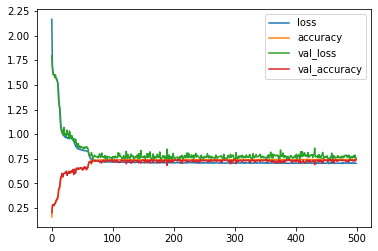

In [130]:
pd.DataFrame(non_norm_hist_20.history).plot()

# **Improving Our Model**

We Can Improve our Model Using Normalization. Neural Networks Prefer Data in Scalar Form. Its Means 0 and 1 Form

In [131]:
train_data.min(), train_data.max()

(0, 255)

In [132]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [133]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

# **Model No 21**

In [134]:
tf.random.set_seed(42)

model_21 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_21.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

non_norm_hist_21 = model_21.fit(train_data_norm, train_labels,epochs=100, validation_data=(test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

In [135]:
model_21.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.8143


[0.5424684286117554, 0.814300000667572]

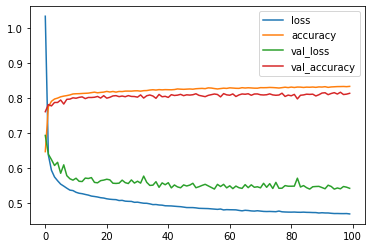

In [136]:
pd.DataFrame(non_norm_hist_21.history).plot()

# **Model No 22**

In [137]:
tf.random.set_seed(42)


model_22 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_22.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_22_hist = model_22.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [138]:
model_22.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.8014


[0.5658251047134399, 0.8014000058174133]

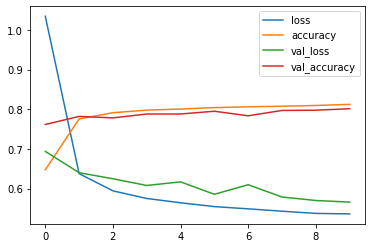

In [139]:
pd.DataFrame(norm_22_hist.history).plot()

# **Model No 23**

In [140]:
from sklearn.utils import validation
tf.random.set_seed(42)

model_23 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_23.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_23_hist = model_23.fit(train_data_norm, train_labels, epochs=500, validation_data=(test_data_norm, test_labels))

Epoch 1/500
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

In [141]:
model_23.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.8152


[0.5589679479598999, 0.8151999711990356]

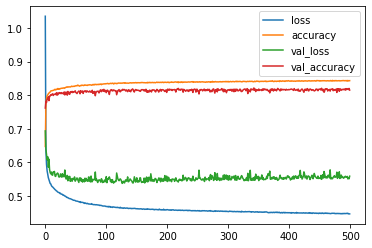

In [142]:
pd.DataFrame(norm_23_hist.history).plot()

# **Compare Normalized and Non Normalized Model**

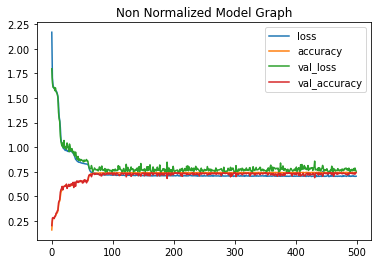

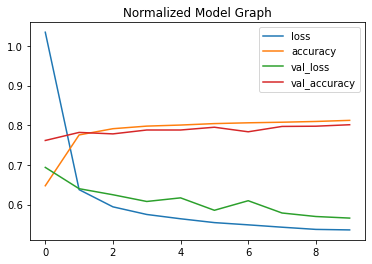

In [143]:
pd.DataFrame(non_norm_hist_20.history).plot(title='Non Normalized Model Graph')
pd.DataFrame(norm_22_hist.history).plot(title='Normalized Model Graph')

# **Ideal Learning Rate**

# **Model No 24**

In [144]:
tf.random.set_seed(42)

model_24 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

model_24.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


# Find Ideal Learning Rate

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 ** (epoch/20))



ideal_lr_24_hist = model_24.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_schedular] )

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [145]:
model_24.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.8528 - accuracy: 0.2779


[1.8527904748916626, 0.27790001034736633]

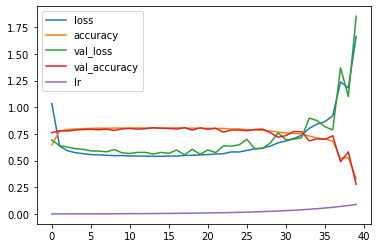

In [146]:
pd.DataFrame(ideal_lr_24_hist.history).plot()

Text(0.5, 1.0, 'Find Ideal Learning Rate')

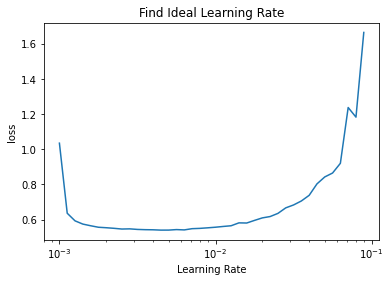

In [147]:
# Plot Learning Rate Decay Curve


lrs = 1e-3*(10**(tf.range(40)/20)) 
plt.semilogx(lrs, ideal_lr_24_hist.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('loss')
plt.title('Find Ideal Learning Rate')





# **Model No 25**

In [148]:
tf.random.set_seed(42)


model_25 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])


model_25.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


# Find Ideal Learning rate


lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3 * 10 ** (epochs/20))


ideal_lr_25_hist = model_25.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

In [149]:
model_25.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 1.8528 - accuracy: 0.2779


[1.8527904748916626, 0.27790001034736633]

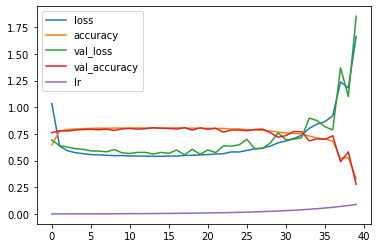

In [150]:
pd.DataFrame(ideal_lr_25_hist.history).plot()

# **Evaluating The Model**

In [152]:
import itertools
figsize = (10,10)


# Create Confusion matrix

def make_confusion_matrix(y_true, y_pred, classes=None,figsize=(10,10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]


  # Lets Pretify it

  fig, ax = plt.subplots(figsize = figsize)

  # Create Matrix Plot

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  # Create Classes

  classes = classes


  if classes:
    labels = classes 
  else:
    labels = np.arange(cm.shape[0])


  # Label The Axes

  ax.set(title= 'Confusion_matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)


  # Set Threshold for Different Colors

  threshold = (cm.max() + cm.min() ) / 2

  # Plot Text on Each Cell


  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm [i,j]} ({cm_norm[i,j] * 100 : .1f}%)",
    horizontalalignment='center',
    color='white' if cm[i,j] > threshold else 'Black',
    size=text_size)
  




In [153]:
y_probs =  model_19.predict(test_data_norm)

In [154]:
y_probs

array([[7.0032567e-02, 7.6976217e-02, 9.1637626e-02, ..., 9.1590688e-02,
        1.3971980e-01, 3.7642324e-04],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, ..., 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, ..., 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       ...,
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, ..., 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, ..., 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       [1.2893389e-01, 1.3644728e-01, 1.4135365e-01, ..., 1.9803660e-03,
        1.5740091e-01, 3.3297212e-05]], dtype=float32)

In [155]:
y_probs[:5]

array([[7.0032567e-02, 7.6976217e-02, 9.1637626e-02, 1.2632681e-01,
        7.3788017e-02, 2.4499668e-01, 8.4555164e-02, 9.1590688e-02,
        1.3971980e-01, 3.7642324e-04],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, 1.3703531e-01,
        1.4090087e-01, 3.7027369e-03, 1.4713694e-01, 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, 1.3703531e-01,
        1.4090087e-01, 3.7027369e-03, 1.4713694e-01, 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, 1.3703531e-01,
        1.4090087e-01, 3.7027369e-03, 1.4713694e-01, 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05],
       [1.3954230e-01, 1.4500552e-01, 1.4220367e-01, 1.3703531e-01,
        1.4090087e-01, 3.7027369e-03, 1.4713694e-01, 4.3297760e-04,
        1.4402749e-01, 1.2119636e-05]], dtype=float32)

In [156]:
y_preds = y_probs.argmax(axis=1)

In [157]:
y_preds

array([5, 6, 6, ..., 6, 6, 8])

In [158]:
y_preds[:10]

array([5, 6, 6, 6, 6, 6, 6, 6, 8, 8])

# **Create Another Confusion Matrix**

In [159]:
from sklearn.metrics import confusion_matrix

In [160]:
confusion_matrix(y_true=test_labels, y_pred = y_preds)

array([[   0,    0,    0,    0,    0,    0,  997,    0,    3,    0],
       [   0,    0,    0,    0,    0,    0,  999,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  993,    0,    7,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,   51,    7,    0,  942,    0],
       [   0,    0,    0,    0,    0,    0,  999,    0,    1,    0],
       [   0,    0,    0,    0,    0,  247,    0,    0,  753,    0],
       [   0,    0,    0,    0,    0,    2,  991,    0,    7,    0],
       [   0,    0,    0,    0,    0,  948,    1,    0,   51,    0]])

# **Make Prettier Confusion Matrix**

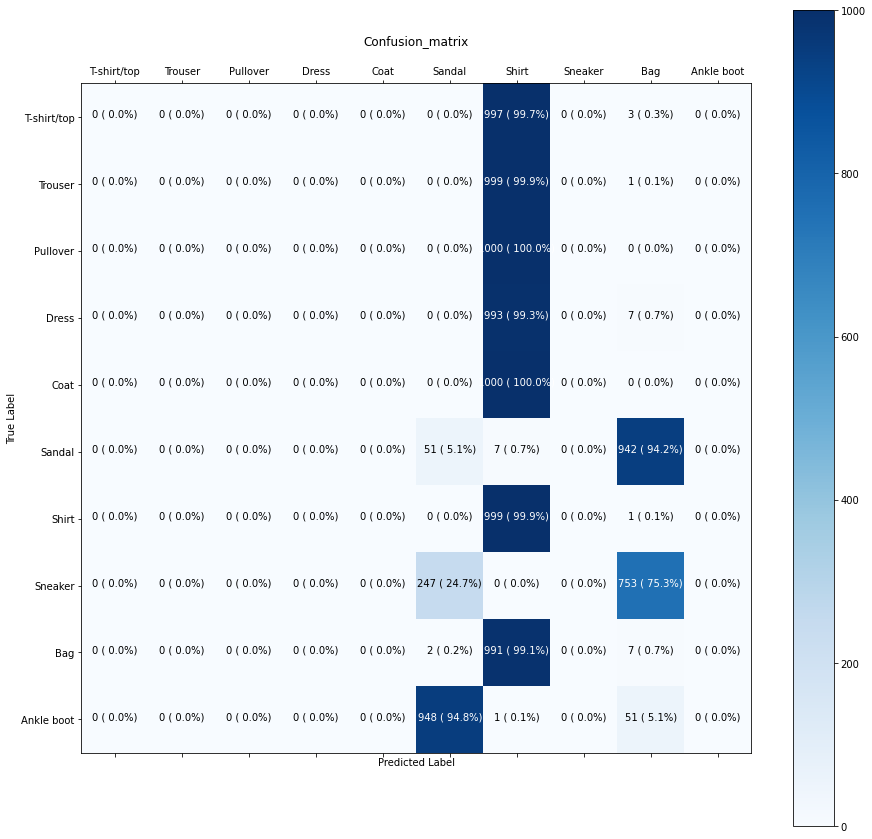

In [161]:
make_confusion_matrix(y_true = test_labels, y_pred = y_preds , classes = class_names,figsize=(15,15), text_size=10)

# **Visualize Random Model Prediction**

In [168]:
import random

def plot_random_image(model, images, true_labels,classes):
  
  # Set Up Random Integer
  i = random.randint(0, len(images))

  # Create Prediction & Target

  target_image = images[i]
  preds_probs = model_25.predict(target_image.reshape(1,28,28))
  pred_label = classes[preds_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot The Image

  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label: 
    color = 'Green'
  else:
    color = 'Red'

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(preds_probs),
                                                   true_label),
             color=color)


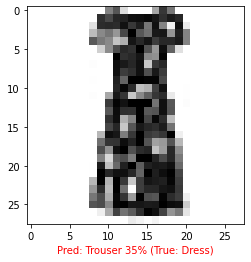

In [179]:
plot_random_image(model=model_25, images=test_data_norm, true_labels = test_labels, classes = class_names)

# **What Pattern Is Our Model Learning**

In [180]:
model_25.layers

In [181]:
# Extract Particular Layers

model_25.layers[1]

In [182]:
# Get Pattern Of Layer in our Network

weights, biases = model_25.layers[1].get_weights()

In [184]:
weights, weights.shape

(array([[ -2.8757718,  -7.820307 ,   5.4204435, -10.102428 ],
        [ -1.9730358,  -3.862489 ,  14.223724 ,  -6.0234976],
        [ 12.935272 ,  -2.6862042,   5.910449 , -17.648296 ],
        ...,
        [ -3.2967076,  16.030033 ,  -8.6996975,   1.5782489],
        [-13.965028 ,  19.780272 ,   2.5514057,   2.1067505],
        [ -2.2586572,   7.3217826,  13.264861 ,  -9.611256 ]],
       dtype=float32), (784, 4))

In [185]:
model_25.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 4)                 3140      
                                                                 
 dense_65 (Dense)            (None, 4)                 20        
                                                                 
 dense_66 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [186]:
biases, biases.shape

(array([  4.8646007,  22.965055 , -27.678528 ,  19.524292 ], dtype=float32),
 (4,))

In [187]:
# The Bias Vector Get Initialized at Zero

# For Each layer in Deep Learning Model, The Previous layer is its input


In [188]:
from tensorflow.keras.utils import plot_model

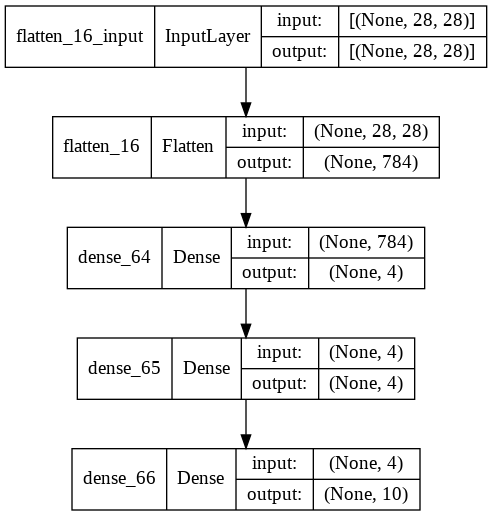

In [189]:
plot_model(model_25, show_shapes=True)

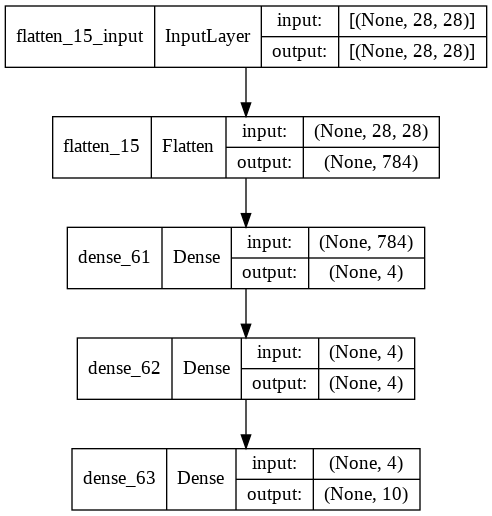

In [190]:
plot_model(model=model_24, show_shapes=True)

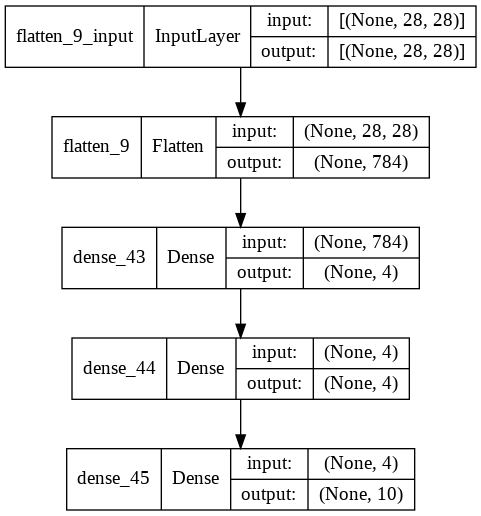

In [191]:
plot_model(model=model_18, show_shapes=True)

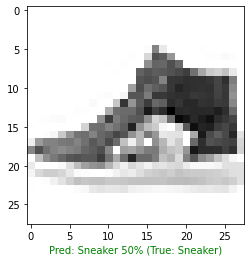

In [196]:
plot_random_image(model=model_25, images=test_data_norm, true_labels = test_labels, classes = class_names)

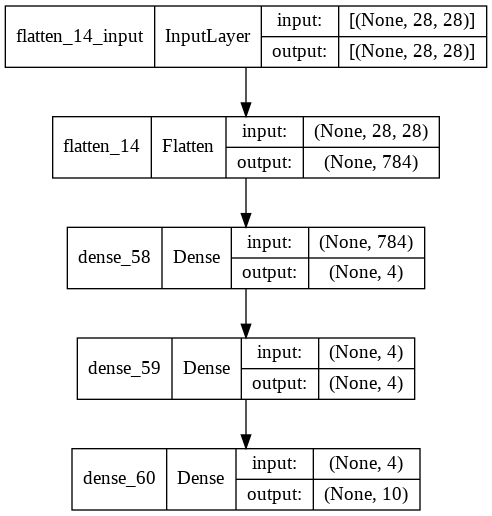

In [197]:
plot_model(model= model_23, show_shapes=True)